在这篇附录中，我会深入NumPy库的数组计算。这会包括ndarray更内部的细节，和更高级的数组操作和算法。

# A.1 ndarray对象的内部机理-----------------------------------------------------------------------

ndarray如此强大的部分原因是所有数组对象都是数据块的一个跨度视图（strided view）。

图A-1简单地说明了ndarray的内部结构。

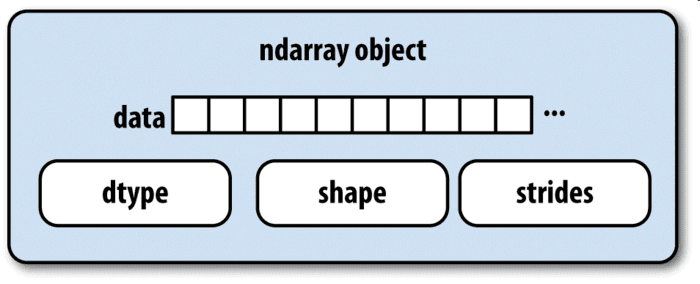

知道跨度是非常有用的，通常，跨度在一个轴上越大，沿这个轴进行计算的开销就越大：



In [1]:
import numpy as np

np.ones((10, 5)).shape

(10, 5)

In [2]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

# NumPy数据类型体系

判断dtype是否属于某个大类的工作非常繁琐。幸运的是，dtype都有一个超类（比如np.integer和np.floating），它们可以跟np.issubdtype函数结合使用：

调用dtype的mro方法即可查看其所有的父类：

A-2说明了dtype体系以及父子类关系。

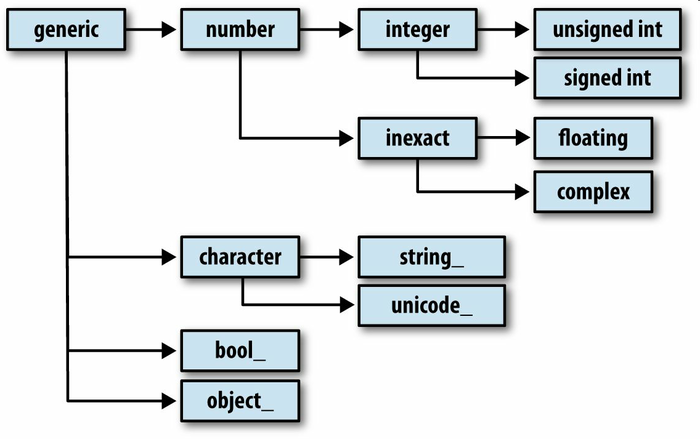

# A.2 高级数组操作----------------------------------------------------------------------------------

除花式索引、切片、布尔条件取子集等操作之外，数组的操作方式还有很多。虽然pandas中的高级函数可以处理数据分析工作中的许多重型任务，但有时你还是需要编写一些在现有库中找不到的数据算法。

# 数组重塑

多数情况下，你可以无需复制任何数据，就将数组从一个形状转换为另一个形状。只需向数组的**实例方法reshape**传入一个表示新形状的元组即可实现该目的。例如，假设有一个一维数组，我们希望将其重新排列为一个矩阵

多维数组也能被重塑：

作为参数的形状的其中**一维可以是－1**，它表示该维度的大小由数据本身推断而来：

与reshape将一维数组转换为多维数组的运算过程相反的运算通常称为扁平化（flattening）或散开（raveling）：【**实例方法ravel**】

如果结果中的值与原始数组相同，ravel不会产生源数据的副本。**flatten方法**的行为类似于ravel，只不过它总是返回数据的副本：

# C和Fortran顺序

像reshape和reval这样的函数，都可以接受一个表示数组数据存放顺序的**order参数**。一般可以是'C'或'F'（还有'A'和'K'等不常用的选项，具体请参考NumPy的文档）。

图A-3对此进行了说明：

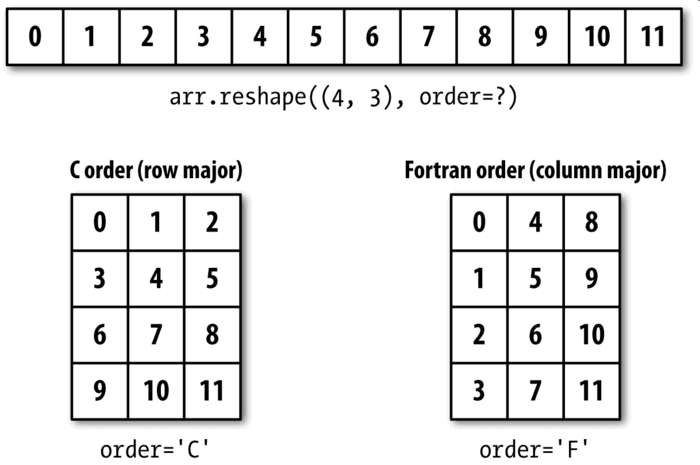


# 数组的合并和拆分 Concatenating and Splitting Arrays

**numpy.concatenate**可以按指定轴将一个由数组组成的序列（如元组、列表等）连接到一起：

对于常见的连接操作，NumPy提供了一些比较方便的**方法（如vstack和hstack）**。因此，上面的运算还可以表达为：

与此相反，**split方法**用于将一个数组沿指定轴拆分为多个数组：传入到np.split的值[1,3]指示在哪个索引处分割数组。【默认axis=0】

表A-1中列出了所有关于数组连接和拆分的函数，
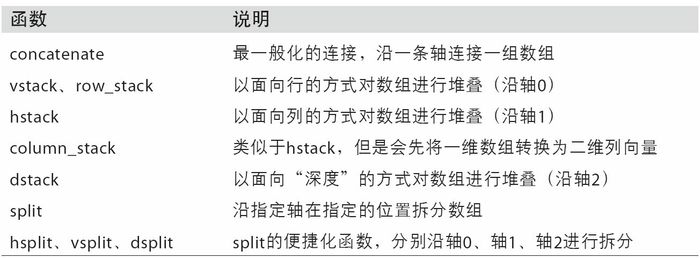


In [3]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [4]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [5]:
np.vstack([arr1, arr2])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [6]:
np.hstack([arr1, arr2])

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [7]:
arr = np.random.randn(5, 2)
np.split(arr, [1, 3])

[array([[ 1.33112543, -1.10056684]]), array([[-1.17971784, -1.18847336],
        [ 0.26279555, -2.10559582]]), array([[ 0.0273583 ,  1.10530117],
        [ 0.55563446,  0.6698023 ]])]

# 堆叠辅助类：r_和c_

NumPy命名空间中有两个**特殊的对象r_和c_**，它们可以使数组的堆叠操作更为简洁：

它还可以将切片转换成数组：

In [8]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = np.random.randn(3, 2)
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-1.76518479,  0.58342172],
       [-1.22427905,  1.33883325],
       [-1.74916836, -0.81645532]])

In [9]:
np.c_[arr1, arr2]

array([[ 0.        ,  1.        , -1.76518479,  0.58342172],
       [ 2.        ,  3.        , -1.22427905,  1.33883325],
       [ 4.        ,  5.        , -1.74916836, -0.81645532]])

In [10]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

# 元素的重复操作：tile和repeat

对数组进行重复以产生更大数组的工具主要是**repeat和tile这两个函数**。repeat会将数组中的各个元素重复一定次数，从而产生一个更大的数组：

默认情况下，如果**传入的是一个整数**，则各元素就都会重复那么多次。如果传入的是**一组整数**，则各元素就可以重复不同的次数：

对于多维数组，还可以让它们的元素沿**指定轴重复**：

注意，如果没有设置轴向，则数组会被扁平化，这可能不会是你想要的结果。同样，在对多维进行重复时，也可以传入一组整数，这样就会使各切片重复不同的次数：

In [11]:
arr = np.arange(3)
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [12]:
arr = np.random.randn(2, 2)
arr

array([[ 2.08826026,  0.32568105],
       [ 0.07766801, -0.05349379]])

In [13]:
arr.repeat(2, axis=0)

array([[ 2.08826026,  0.32568105],
       [ 2.08826026,  0.32568105],
       [ 0.07766801, -0.05349379],
       [ 0.07766801, -0.05349379]])

In [14]:
 arr.repeat([2, 3], axis=0)

array([[ 2.08826026,  0.32568105],
       [ 2.08826026,  0.32568105],
       [ 0.07766801, -0.05349379],
       [ 0.07766801, -0.05349379],
       [ 0.07766801, -0.05349379]])

In [15]:
arr.repeat([2, 3], axis=1)

array([[ 2.08826026,  2.08826026,  0.32568105,  0.32568105,  0.32568105],
       [ 0.07766801,  0.07766801, -0.05349379, -0.05349379, -0.05349379]])

**np.tile**的功能是沿指定轴向堆叠数组的副本。你可以形象地将其想象成“铺瓷砖”：

第二个参数是瓷砖的数量。对于标量，瓷砖是水平铺设的，而不是垂直铺设。它可以是一个表示“铺设”布局的元组：【**传入元祖**】

In [16]:
np.tile(arr, 2)

array([[ 2.08826026,  0.32568105,  2.08826026,  0.32568105],
       [ 0.07766801, -0.05349379,  0.07766801, -0.05349379]])

In [17]:
np.tile(arr, (2, 1))

array([[ 2.08826026,  0.32568105],
       [ 0.07766801, -0.05349379],
       [ 2.08826026,  0.32568105],
       [ 0.07766801, -0.05349379]])

# 花式索引的等价函数：take和put

在第4章中我们讲过，获取和设置数组子集的一个办法是通过整数数组使用花式索引：

ndarray还有其它方法用于获取单个轴向上的选区：

要在其它轴上使用take，只需传入axis关键字即可：

put不接受axis参数，它只会在数组的扁平化版本（一维，C顺序）上进行索引。因此，在需要用其他轴向的索引设置元素时，最好还是使用花式索引。

In [18]:
inds = [2, 0, 2, 1]
arr = np.random.randn(2, 4)
arr

array([[ 0.84172488, -0.20821585,  0.82047388, -0.11494065],
       [ 0.44712619,  1.2879535 , -1.12344819,  1.40522245]])

In [19]:
arr.take(inds, axis=1)

array([[ 0.82047388,  0.84172488,  0.82047388, -0.20821585],
       [-1.12344819,  0.44712619, -1.12344819,  1.2879535 ]])

# A.3 广播 Broadcasting----------------------------------------------------------------------------

广播（broadcasting）指的是不同形状的数组之间的算术运算的执行方式。它是一种非常强大的功能，但也容易令人误解，即使是经验丰富的老手也是如此。将标量值跟数组合并时就会发生最简单的广播：

看一个例子，我们可以通过减去列平均值的方式对数组的每一列进行距平化处理。这个问题解决起来非常简单：

图A-4形象地展示了该过程。用广播的方式对行进行距平化处理会稍微麻烦一些。幸运的是，只要遵循一定的规则，低维度的值是可以被广播到数组的任意维度的（比如对二维数组各列减去行平均值）。
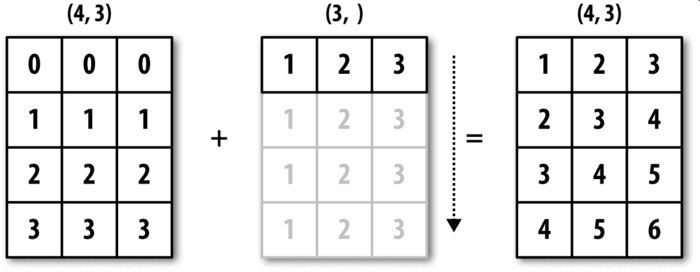

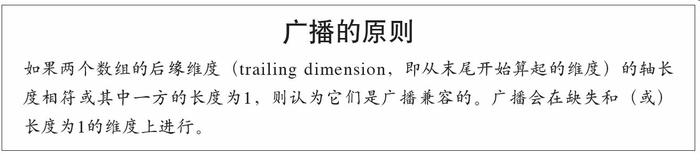

广播会在**缺失或长度为1的维度**上进行。

根据该原则，要在1轴向上做减法（即各行减去行平均值），较小的那个数组的形状必须是(4,1)：

图A-5说明了该运算的过程。
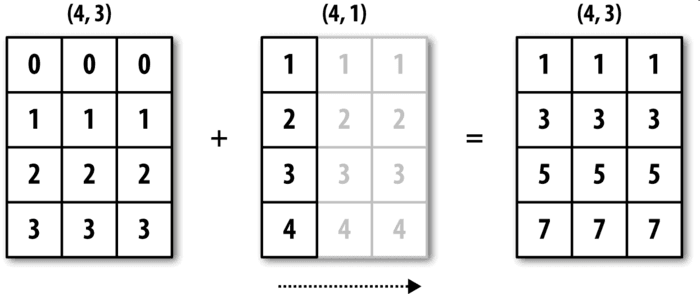

# 沿其它轴向广播

对于三维的情况，在三维中的任何一维上广播其实也就是将数据重塑为兼容的形状而已。图A-7说明了要在三维数组各维度上广播的形状需求。
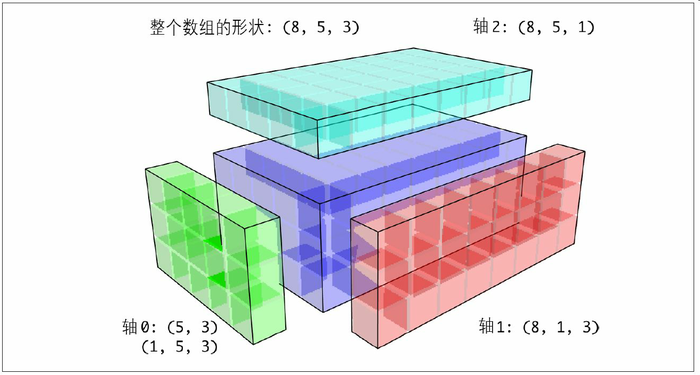

于是就有了一个非常普遍的问题（尤其是在通用算法中），即专门为了广播而添加一个长度为1的新轴。虽然reshape是一个办法，但插入轴需要构造一个表示新形状的元组。这是一个很郁闷的过程。因此，NumPy数组提供了一种通过索引机制插入轴的特殊语法。下面这段代码通过特殊的**np.newaxis属性以及“全”切片**来插入新轴：

In [20]:
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape

(4, 1, 4)

In [21]:
arr_1d = np.random.normal(size=3)
arr_1d[:, np.newaxis]

array([[ 0.30870322],
       [ 0.41774962],
       [ 0.16619801]])

In [22]:
arr_1d[np.newaxis, :]

array([[ 0.30870322,  0.41774962,  0.16619801]])

因此，如果我们有一个三维数组，并希望对轴2进行距平化，那么只需要编写下面这样的代码就可以了：

有些读者可能会想，在对指定轴进行距平化时，有没有一种既通用又不牺牲性能的方法呢？实际上是有的，但需要一些索引方面的技巧：

In [23]:
arr = np.random.randn(3, 4, 5)
depth_means = arr.mean(2)
depth_means.shape

(3, 4)

In [24]:
demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.shape

(3, 4, 5)

In [25]:
demeaned.mean(2)

array([[  8.88178420e-17,   0.00000000e+00,  -3.33066907e-17,
         -8.88178420e-17],
       [ -5.55111512e-18,   8.88178420e-17,   2.22044605e-17,
          2.22044605e-17],
       [  0.00000000e+00,  -8.88178420e-17,  -4.44089210e-17,
         -1.55431223e-16]])

# 通过广播设置数组的值

算术运算所遵循的广播原则同样也适用于通过索引机制设置数组值的操作。对于最简单的情况，我们可以这样做：

但是，假设我们想要用一个一维数组来设置目标数组的各列，只要保证形状兼容就可以了：



In [26]:
arr = np.zeros((4, 3))
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [27]:
col[:, np.newaxis]

array([[ 1.28],
       [-0.42],
       [ 0.44],
       [ 1.6 ]])

# A.4 ufunc高级应用----------------------------------------------------------------------------------

NumPy的各个二元ufunc都有一些用于执行特定矢量化运算的特殊方法。表A-2汇总了这些方法，
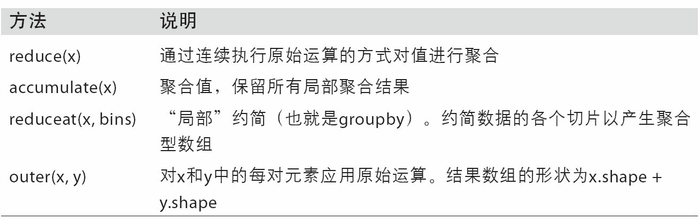

下面我将通过几个具体的例子对它们进行说明。

**reduce**接受一个数组参数，并通过一系列的二元运算对其值进行聚合（可指明轴向）。例如，我们可以用np.add.reduce对数组中各个元素进行求和：

起始值取决于ufunc（对于add的情况，就是0）。如果设置了轴号，约简运算就会沿该轴向执行。这就使你能用一种比较简洁的方式得到某些问题的答案。在下面这个例子中，我们用np.logical_and检查数组各行中的值是否是有序的：

**accumulate**跟reduce的关系就像cumsum跟sum的关系那样。它产生一个跟原数组大小相同的中间“累计”值数组：

In [28]:
arr = np.arange(10)
np.add.reduce(arr)

45

In [29]:
np.random.seed(12346)
arr = np.random.randn(5, 5)
arr[::2].sort(1)  # 
arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [30]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True], dtype=bool)

In [31]:
arr = np.arange(15).reshape((3, 5))
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]], dtype=int32)

**outer**用于计算两个数组的叉积：

outer输出结果的维度是两个输入数据的维度之和：

In [32]:
arr = np.arange(3).repeat([1, 2, 2])
arr

array([0, 1, 1, 2, 2])

In [33]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

In [34]:
x, y = np.random.randn(3, 4), np.random.randn(5)
result = np.subtract.outer(x, y)
result.shape

(3, 4, 5)

最后一个方法**reduceat**用于计算“局部约简”，其实就是一个对数据各切片进行聚合的groupby运算。它接受一组用于指示如何对值进行拆分和聚合的“面元边界”：

最终结果是在arr[0:5]、arr[5:8]以及arr[8:]上执行的约简。跟其他方法一样，这里也可以传入一个axis参数：



In [35]:
arr = np.arange(10)
np.add.reduceat(arr, [0,5,8])

array([10, 18, 17], dtype=int32)

# 编写新的ufunc

有多种方法可以让你编写自己的NumPy ufuncs。最常见的是使用NumPy C API，但它超越了本书的范围。在本节，我们讲纯粹的Python ufunc。

**numpy.frompyfunc**接受一个Python函数以及两个分别表示输入输出参数数量的参数。例如，下面是一个能够实现元素级加法的简单函数：
```
frompyfunc(func, nin, nout)
```
用frompyfunc创建的函数总是返回Python对象数组，这一点很不方便。幸运的是，还有另一个办法，即numpy.vectorize。虽然没有frompyfunc那么强大，但可以让你指定输出类型：

虽然这两个函数提供了一种创建ufunc型函数的手段，但它们非常慢，因为它们在计算每个元素时都要执行一次Python函数调用，这就会比NumPy自带的基于C的ufunc慢很多：

In [36]:
def add_elements(x, y):
    return x+y

add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

In [37]:
add_them = np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.])

# A.5 结构化和记录式数组 Structured and Record Arrays-------------------------------

到目前为止我们所讨论的ndarray都是一种同质数据容器，也就是说，在它所表示的内存块中，各元素占用的字节数相同（具体根据dtype而定）。从表面上看，它似乎不能用于表示异质或表格型的数据。

结构化数组是一种特殊的ndarray，其中的各个元素可以被看做C语言中的结构体（struct，这就是“结构化”的由来）或SQL表中带有多个命名字段的行：

定义结构化dtype（请参考NumPy的在线文档）的方式有很多。**最典型的办法是元组列表**，各元组的格式为(field_name,field_data_type)。这样，数组的元素就成了元组式的对象，该对象中各个元素可以像字典那样进行访问：

字段名保存在**dtype.names属性**中。在访问结构化数组的某个字段时，返回的是该数据的视图，所以不会发生数据复制：

In [38]:
dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([( 1.5       ,  6), ( 3.14159265, -2)], 
      dtype=[('x', '<f8'), ('y', '<i4')])

In [39]:
sarr[0]

( 1.5, 6)

In [40]:
sarr[0]['y']

6

In [41]:
sarr[:]['y']

array([ 6, -2])

In [42]:
sarr['x']

array([ 1.5       ,  3.14159265])

# 嵌套dtype和多维字段 Nested dtypes and Multidimensional Fields

在定义结构化dtype时，你可以**再设置一个形状**（可以是一个整数，也可以是一个元组）：

在这种情况下，各个记录的x字段所表示的是一个长度为3的数组：

这样，访问arr['x']即可得到一个二维数组，而不是前面那个例子中的一维数组：

In [43]:
dtype = [('x', np.int64, 3), ('y', np.int32)]

In [44]:
arr = np.zeros(4, dtype=dtype)
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)], 
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

In [45]:
arr[0]['x']

array([0, 0, 0], dtype=int64)

这就使你能用单个数组的内存块存放复杂的嵌套结构。你还可以嵌套dtype，作出更复杂的结构。下面是一个简单的例子：

pandas的DataFrame并不直接支持该功能，但它的分层索引机制跟这个差不多。

In [46]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)
data['x']

array([( 1.,  2.), ( 3.,  4.)], 
      dtype=[('a', '<f8'), ('b', '<f4')])

In [47]:
data['y']

array([5, 6])

In [48]:
data['x']['a']

array([ 1.,  3.])

# 为什么要用结构化数组

跟pandas的DataFrame相比，NumPy的结构化数组是一种相对较低级的工具。它可以将单个内存块解释为带有任意复杂嵌套列的表格型结构。由于数组中的每个元素在内存中都被表示为固定的字节数，所以结构化数组能够提供非常快速高效的磁盘数据读写（包括内存映像）、网络传输等功能。

结构化数组的另一个常见用法是，将数据文件写成定长记录字节流，这是C和C++代码中常见的数据序列化手段（业界许多历史系统中都能找得到）。只要知道文件的格式（记录的大小、元素的顺序、字节数以及数据类型等），就可以用np.fromfile将数据读入内存。这种用法超出了本书的范围，知道这点就可以了。

# A.6 更多有关排序的话题---------------------------------------------------------------------------

跟Python内置的列表一样，ndarray的**sort实例方法**也是就地排序。也就是说，数组内容的重新排列是不会产生新数组的：

在对数组进行就地排序时要注意一点，如果目标数组只是一个视图，则原始数组将会被修改：

相反，**numpy.sort**会为原数组创建一个已排序副本。另外，它所接受的参数（比如kind）跟ndarray.sort一样：

这两个排序方法都可以接受一个axis参数，以便沿指定轴向对各块数据进行单独排序：

Python用户都很熟悉一个有关列表的小技巧：values[::-1]可以返回一个反序的列表。对ndarray也是如此：

# 间接排序：argsort和lexsort

给定一个或多个键，你就可以得到一个由整数组成的索引数组（我亲切地称之为索引器），其中的索引值说明了数据在新顺序下的位置。argsort和numpy.lexsort就是实现该功能的两个主要方法。下面是一个简单的例子：

In [49]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort()
indexer

array([1, 2, 4, 3, 0], dtype=int32)

In [50]:
values[indexer]

array([0, 1, 2, 3, 5])

一个更复杂的例子，下面这段代码根据数组的第一行对其进行排序：

In [52]:
arr = np.random.randn(3,5)
arr[0] = values
arr

array([[ 5.        ,  0.        ,  1.        ,  3.        ,  2.        ],
       [ 0.5391877 ,  1.29070685,  0.86761856,  0.41133011,  0.44593599],
       [-0.3171888 , -1.04929141,  1.34589315,  0.35600969, -0.09152874]])

In [53]:
arr[:, arr[0].argsort()]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  5.        ],
       [ 1.29070685,  0.86761856,  0.44593599,  0.41133011,  0.5391877 ],
       [-1.04929141,  1.34589315, -0.09152874,  0.35600969, -0.3171888 ]])

lexsort跟argsort差不多，只不过它可以一次性对多个键数组执行间接排序（字典序）。假设我们想对一些以姓和名标识的数据进行排序：

刚开始使用lexsort的时候可能会比较容易头晕，这是因为键的应用顺序是从最后一个传入的算起的。不难看出，last_name是先于first_name被应用的。

In [54]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])

sorter = np.lexsort((first_name, last_name))
sorter

array([1, 2, 3, 0, 4], dtype=int32)

# 其他排序算法

稳定的（stable）排序算法会保持等价元素的相对位置。对于相对位置具有实际意义的那些间接排序而言，这一点非常重要：

mergesort（合并排序）是唯一的稳定排序，它保证有O(n log n)的性能（空间复杂度），但是其平均性能比默认的quicksort（快速排序）要差。表A-3列出了可用的排序算法及其相关的性能指标。大部分用户完全不需要知道这些东西，但了解一下总是好的。

# 部分排序数组

排序的目的之一可能是确定数组中最大或最小的元素。NumPy有两个优化方法，numpy.partition和np.argpartition，可以在第k个最小元素划分的数组：

当你调用partition(arr, 3)，结果中的头三个元素是最小的三个，没有特定的顺序。numpy.argpartition与numpy.argsort相似，会返回索引，重排数据为等价的顺序：

# numpy.searchsorted：在有序数组中查找元素

searchsorted是一个在有序数组上执行二分查找的数组方法，只要将值插入到它返回的那个位置就能维持数组的有序性：

你可以传入一组值就能得到一组索引：

从上面的结果中可以看出，对于元素0，searchsorted会返回0。这是因为其默认行为是返回相等值组的左侧索引：

# A.7 用Numba编写快速NumPy函数-------------------------------------------------------------

Numba是一个开源项目，它可以利用CPUs、GPUs或其它硬件为类似NumPy的数据创建快速函数。它使用了LLVM项目（http://llvm.org/），将Python代码转换为机器代码。

为了介绍Numba，来考虑一个纯粹的Python函数，它使用for循环计算表达式(x - y).mean()：

这个函数很慢：

NumPy的版本要比它快过100倍。我们可以转换这个函数为编译的Numba函数，使用**numba.jit函数**：

也可以写成装饰器：**@numba.git**

它要比矢量化的NumPy快：

In [55]:
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

In [56]:
x = np.random.randn(10000000)
y = np.random.randn(10000000)

%timeit mean_distance(x, y)

1 loop, best of 3: 13 s per loop


In [57]:
%timeit (x-y).mean()

1 loop, best of 3: 165 ms per loop


In [58]:
import numba as nb
numba_mean_distance = nb.jit(mean_distance)

In [59]:
%timeit numba_mean_distance(x, y)

The slowest run took 23.28 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 48.4 ms per loop


# 用Numba创建自定义numpy.ufunc对象

# A.8 高级数组输入输出------------------------------------------------------------------------------

我在第4章中讲过，np.save和np.load可用于读写磁盘上以二进制格式存储的数组。其实还有一些工具可用于更为复杂的场景。尤其是内存映像（memory map），它使你能处理在内存中放不下的数据集。

# 内存映像文件 Memory-Mapped Files

内存映像文件是一种将磁盘上的非常大的二进制数据文件当做内存中的数组进行处理的方式。NumPy实现了一个类似于ndarray的memmap对象，它允许将大文件分成小段进行读写，而不是一次性将整个数组读入内存。另外，memmap也拥有跟普通数组一样的方法，因此，基本上只要是能用于ndarray的算法就也能用于memmap。

要创建一个内存映像，可以使用函数np.memmap并传入一个文件路径、数据类型、形状以及文件模式：


# HDF5及其他数组存储方式

# A.9 性能建议 Performance Tips------------------------------------------------------------------

使用NumPy的代码的性能一般都很不错，因为数组运算一般都比纯Python循环快得多。下面大致列出了一些需要注意的事项：

1. 将Python循环和条件逻辑转换为数组运算和布尔数组运算。
2. 尽量使用广播。
3. 避免复制数据，尽量使用数组视图（即切片）。
4. 利用ufunc及其各种方法。

如果单用NumPy无论如何都达不到所需的性能指标，就可以考虑一下用C、Fortran或Cython（等下会稍微介绍一下）来编写代码。

# 连续内存的重要性